In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

## Load the clean BASMI data

This dataset is a pivoted version of the BASMI data, and also contains information about which drug the patient was using at the time.

In [2]:
basmi_df = pd.read_excel('data/clean_basmi.xls', index_col=(0,1)).reset_index()

# Turn the Drug column into binary
basmi_df['Drug_Indicator'] = basmi_df['Drug'].notnull().map({False: 0, True: 1})
basmi_df.drop('Drug',axis=1, inplace=True)

print('Number of patients in basmi dataset:', len(basmi_df['patient_id'].unique()))

basmi_df.head()

Number of patients in basmi dataset: 910


,patient_id,Date,CRS,TWS,LSFS,LFS,IMS,BS,Drug_Indicator
0,40,1995-05-09,3,1,6,5,3,3.6,0
1,40,1995-06-01,3,1,8,5,3,4.0,0
2,40,1995-06-12,2,1,5,3,2,2.6,0
3,40,1995-11-02,1,1,3,4,2,2.2,0
4,40,1996-05-02,2,1,4,3,2,2.4,0


In [3]:
# Demographics DataFrame
demo_df = pd.read_excel('data/demographics and Biologics data.xlsx')

print('Number of patients in demographics data :', len(demo_df['patient_id'].unique()))
print('Shape of the dataset: ',demo_df.shape)
demo_df.head()

Number of patients in demographics data : 721
Shape of the dataset:  (721, 10)


,patient_id,patient_gender_id,patient_date_of_diagnosis,Age at diagnosis,patient_hla_bUnknown7_id,EIBP,patient_condition_subtype,Current biologic,Number of biologics used (not including brand/biosimilar switch),year of Birth
0,40,Female,1994-01-01,46.255989,Positive,False,AS,Infliximab,1,1947
1,41,Male,2003-01-01,46.644764,Positive,False,AS,Adalimumab,1,1956
2,43,Male,1978-01-01,20.410678,Positive,False,AS,Adalimumab,1,1957
3,44,Male,1994-01-01,22.047912,Unknown,False,AS,Adalimumab,1,1971
4,45,Male,1998-01-01,37.048597,Positive,False,AS,Etanercept,1,1960


### Deal with missing values

The dataset has some missing values...Lets remove all rows with any missing values from the dataset..

In [4]:
demo_df.dropna(how='any',inplace=True)
print('Updated shape : ',demo_df.shape)
demo_df.head()

Updated shape :  (679, 10)


,patient_id,patient_gender_id,patient_date_of_diagnosis,Age at diagnosis,patient_hla_bUnknown7_id,EIBP,patient_condition_subtype,Current biologic,Number of biologics used (not including brand/biosimilar switch),year of Birth
0,40,Female,1994-01-01,46.255989,Positive,False,AS,Infliximab,1,1947
1,41,Male,2003-01-01,46.644764,Positive,False,AS,Adalimumab,1,1956
2,43,Male,1978-01-01,20.410678,Positive,False,AS,Adalimumab,1,1957
3,44,Male,1994-01-01,22.047912,Unknown,False,AS,Adalimumab,1,1971
4,45,Male,1998-01-01,37.048597,Positive,False,AS,Etanercept,1,1960


### Descriptive Stats

Now, lets look at some descriptive statistics.

#### Age distribution

First, lets take a look at the age distribution. Because age naturally changes over time, we will use the age at first diagnosis - ie the age at which the patient entered the study. 

In [8]:
demo_df.dtypes

patient_id                                                                   int64
patient_gender_id                                                           object
patient_date_of_diagnosis                                           datetime64[ns]
Age at diagnosis                                                           float64
patient_hla_bUnknown7_id                                                    object
EIBP                                                                          bool
patient_condition_subtype                                                   object
Current biologic                                                            object
Number of biologics used (not including brand/biosimilar switch)            object
year of Birth                                                                int64
dtype: object

In [6]:
age_at_entry = demo_df['Age at diagnosis'].values

# ax = sns.distplot(age_at_entry )


# ax.set_title('Age Distribution')
# ax.set_xlabel('Age')
# ax.set_ylabel('Prob')

[ 46.25598905  46.64476386  20.41067762  22.04791239  37.04859685
  22.37097878  29.0294319   23.08281999  17.58795346  20.25735797
  24.07665982  19.74264203  17.2238193   33.13894593  21.76865161
  34.36550308  22.58726899  27.87953457  14.97330595  21.82888433
  29.16632444  35.03080082  15.85763176  15.60574949  34.61738535
  24.98015058  27.63039014  19.02806297  31.47980835  19.2936345
  27.4715948   30.19849418  28.84599589  35.05817933  33.62354552
  26.04243669  19.40314853  26.93497604  27.96440794  15.47980835
  18.04791239  34.47501711  43.62217659  25.53045859  32.99931554
  25.54962355  54.39014374  28.10677618  24.07118412  37.02669405
  41.10335387  27.01711157  24.68172485  25.44832307  20.60780287
  39.12388775  24.08213552  20.50102669  32.61327858  31.55373032
  26.27241615  24.40520192  36.98288843  31.11841205  31.60301164
  44.60780287  23.07460643  19.74811773  37.68925394  37.45653662
  35.23887748  26.71321013  15.34017796  34.275154    22.80355921
  25.051334

#### Gender

Lets look at the gender distribution and also some basic stats on the BASMI score for each gender group

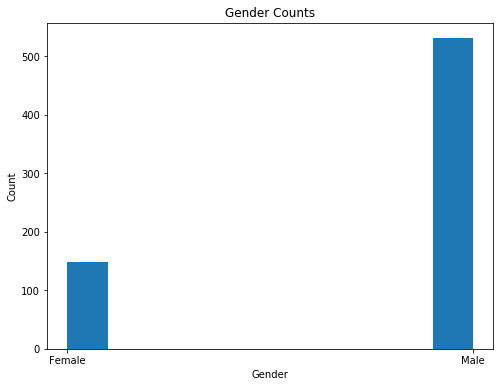

In [7]:
genders = demo_df['patient_gender_id']

# First plot the distribution
fig = plt.figure(figsize=(8,6))
plt.hist(genders)
plt.title('Gender Counts')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [8]:
# # Get some stats about male and female patients
# male_ids = demo_df[genders == 'Male']['patient_id']
# female_ids = demo_df[genders == 'Female']['patient_id']


# # Most probably not the best way to do this, but whatever
# male_basmi_df = basmi_df[basmi_df['patient_id'].isin(male_ids)]
# female_basmi_df = basmi_df[basmi_df['patient_id'].isin(female_ids)]

# # Get the average BS score for each male patient
# # TODO - Check the averaging method with LUCA
# avg_male_bs_df = male_basmi_df.groupby(male_basmi_df['patient_id']).agg({'BS': 'mean'})
# avg_female_bs_df = female_basmi_df.groupby(female_basmi_df['patient_id']).agg({'BS': 'mean'})

# # # Now get the average BS score over all male and female patients
# print('Male BS Score Information:\n')
# print(avg_male_bs_df.describe())

# print('\n\nFemale BS Score Information:\n')
# print(avg_female_bs_df.describe())